# Wojciech Pragłowski

## laboratorium 6 - pandas

### Zadanie 1

In [10]:
import pandas as pd

inflacja = pd.read_excel('inflacja.xlsx')
inflacja.head()
inflacja.tail()

,Nazwa zmiennej,Jednostka terytorialna,Sposób prezentacji,Rok,Wartość,Flaga
66,Wskaźnik cen towarów i usług konsumpcyjnych,Polska,Rok poprzedni = 100,2016,99.4,NaN
67,Wskaźnik cen towarów i usług konsumpcyjnych,Polska,Rok poprzedni = 100,2017,102.0,NaN
68,Wskaźnik cen towarów i usług konsumpcyjnych,Polska,Rok poprzedni = 100,2018,101.6,NaN
69,Wskaźnik cen towarów i usług konsumpcyjnych,Polska,Rok poprzedni = 100,2019,102.3,NaN
70,Wskaźnik cen towarów i usług konsumpcyjnych,Polska,Rok poprzedni = 100,2020,103.4,NaN


#### 1.1

In [2]:
print("Najwyższy wskaźnik inflacji:\n", inflacja['Wartość'][inflacja['Wartość'] == max(inflacja['Wartość'])])
print("\nNajniższy wskaźnik inflacji:\n", inflacja['Wartość'][inflacja['Wartość'] == min(inflacja['Wartość'])])

Najwyższy wskaźnik inflacji:
 40    685.8
Name: Wartość, dtype: float64

Najniższy wskaźnik inflacji:
 4    93.7
Name: Wartość, dtype: float64


#### 1.2 

In [3]:
print('Rok z najwyższym wskaźnikiem inflacji:\n', inflacja.Rok[inflacja['Wartość'] == max(inflacja['Wartość'])])
print('\nRok najniższym wskaźnikiem inflacji:\n', inflacja.Rok[inflacja['Wartość'] == min(inflacja['Wartość'])])

Rok z najwyższym wskaźnikiem inflacji:
 40    1990
Name: Rok, dtype: int64

Rok najniższym wskaźnikiem inflacji:
 4    1954
Name: Rok, dtype: int64


#### 1.3

In [7]:
sum_of_infl = inflacja['Wartość'].tolist()
avg = sum(sum_of_infl) / len(sum_of_infl)
print("Lata gdzie inflacja była większa od średniej inflacji:\n", inflacja.Rok[inflacja['Wartość'] > avg])

Lata gdzie inflacja była większa od średniej inflacji:
 3     1953
32    1982
33    1983
37    1987
38    1988
39    1989
40    1990
41    1991
42    1992
43    1993
44    1994
45    1995
Name: Rok, dtype: int64


#### 1.wykres

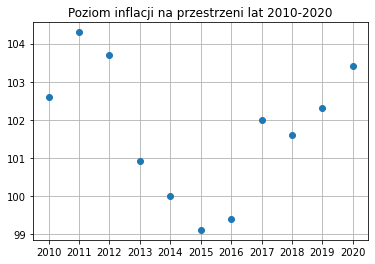

In [27]:
import matplotlib.pyplot as plt

lata = inflacja['Rok'][60:]
poziom_inflacji = inflacja['Wartość'][60:]

plt.plot(range(11), poziom_inflacji, "o")
plt.xticks(range(11), lata)
plt.title("Poziom inflacji na przestrzeni lat 2010-2020")
plt.grid()

plt.show()

### Zadanie 2

#### 1.1

In [88]:
wynagrodzenia = pd.read_html('https://pl.wikipedia.org/wiki/Przeci%C4%99tne_wynagrodzenie', decimal='.')
wynagrodzenia[2]

Struktura wynagrodzeń brutto według zawodów w październiku danego roku[19][20][21] (w jednostkach zatrudniających powyżej 9 osób)  \
                                                                                                                                 Rok   
0                                                1999                                                                                  
1                                                2001                                                                                  
2                                                2002                                                                                  
3                                                2004                                                                                  
4                                                2006                                                                                  
5                                                2008                                                                                  
6                                                2010                                                                                  
7                                                2012                                                                                  
8                                                2014                                                                                  
9                                                2016                                                                                  
10                                               2018                                                                                  

                                                        \
   Minimalne wynagrodzenie ustawowe Decyl pierwszy[22]   
0                             52800              83467   
1                             76000              98103   
2                             80000              93248   
3                             82400              96102   
4                             89910           1 040,67   
5                          1 126,00           1 306,78   
6                          1 317,00           1 478,70   
7                          1 500,00           1 600,00   
8                          1 680,00           1 718,00   
9                          1 850,00           1 890,32   
10                         2 100,00           2 224,17   

                                                           \
   Dominanta (najczęstsze wynagrodzenie, wartość modalna)   
0                                                b.d.       
1                                                b.d.       
2                                                b.d.       
3                                            1 184,30       
4                                            1 469,09       
5                                            2 091,35       
6                                            2 020,13       
7                                            2 189,11       
8                                            2 469,47       
9                                            2 074,03       
10                                               b.d.       

                                                                               \
   Decyl piąty (mediana, wynagrodzenie środkowe)[23] Przeciętne wynagrodzenie   
0                                           1 486,91                 1 800,31   
1                                           1 825,92                 2 216,55   
2                                           1 820,73                 2 229,80   
3                                           1 907,61                 2 368,52   
4                                           2 130,43                 2 654,13   
5                                           2 639,51                 3 232,07   
6                                    

#### 1.2

In [123]:
wynagrodzenia_dot = wynagrodzenia[2]['Struktura wynagrodzeń brutto według zawodów w październiku danego roku[19][20][21] (w jednostkach zatrudniających powyżej 9 osób)']['Minimalne wynagrodzenie ustawowe'].apply(lambda x: x.replace(',','.'))
wynagrodzenia_space = wynagrodzenia_dot.str.replace(' ','')
float_wynagrodzenia = wynagrodzenia_space.astype(float)
final = float_wynagrodzenia[0:5]/100
rest = float_wynagrodzenia[5:]
minimalne_wynagrodzenie = [i for i in final]
for i in rest:
    minimalne_wynagrodzenie.append(i)
minimalne_wynagrodzenie

[528.0,
 760.0,
 800.0,
 824.0,
 899.1,
 1126.0,
 1317.0,
 1500.0,
 1680.0,
 1850.0,
 2100.0]

In [129]:
przecietne_dot = wynagrodzenia[2]['Struktura wynagrodzeń brutto według zawodów w październiku danego roku[19][20][21] (w jednostkach zatrudniających powyżej 9 osób)']['Przeciętne wynagrodzenie'].apply(lambda x: x.replace(',','.'))
przecietne_space = przecietne_dot.str.replace(' ', '')
float_przecietne = przecietne_space.astype(float)
przecietne_wynagrodzenie = [i for i in float_przecietne]
przecietne_wynagrodzenie

[1800.31,
 2216.55,
 2229.8,
 2368.52,
 2654.13,
 3232.07,
 3543.5,
 3895.72,
 4107.72,
 4346.76,
 5003.78]

#### 1.3

Stosunek wynagrodzeń wynosi 2.6448442554971945


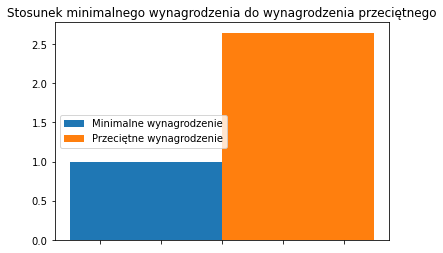

In [169]:
import numpy as np

stosunek_wynagrodzen = sum(przecietne_wynagrodzenie)/sum(minimalne_wynagrodzenie)
print("Stosunek wynagrodzeń wynosi", stosunek_wynagrodzen)

minimalne = 1
przecietne = minimalne*stosunek_wynagrodzen
x = np.arange(1)
bar_width = 0.05

fig, ax = plt.subplots()
first_bar = ax.bar(x-bar_width/2, minimalne, bar_width, label="Minimalne wynagrodzenie")
second_bar = ax.bar(x+bar_width/2, przecietne, bar_width, label="Przeciętne wynagrodzenie")

ax.set_title("Stosunek minimalnego wynagrodzenia do wynagrodzenia przeciętnego")
ax.legend(loc='center left')
ax.set_xticklabels("")
plt.show()
